Exploratory Analysis of Amazon Product Review Data

In [2]:
# Modules

from helpers import *
import string, re
import pymongo as mongo
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Constants
DATABASE_NAME = "amazon"
COLLECTION_NAME = "electronics"
N_COMMON_WORDS = 75

# Point to the MongoDB collection
client = mongo.MongoClient(host="localhost", port=27017)
collection = client[DATABASE_NAME][COLLECTION_NAME]

In [4]:
mongoPull = collection.find({}, {"overall": 1,
                                 "reviewerID": 1,
                                 "unixReviewTime": 1,
                                 "reviewText": 1,
                                 "_id": 0}).limit(1000)
reviews = list(mongoPull)

In [5]:
# Remove tokens that match this regex
regex = re.compile('[{0}{1}\s]'.format(re.escape(string.punctuation), string.digits))

# Get set of common words
word_set = get_word_set(reviews, "reviewText", regex)
most_common = word_set.most_common(N_COMMON_WORDS)
common_words = [Tuple[0] for Tuple in most_common]
common_counts = [Tuple[1] for Tuple in most_common]

plt.plot(common_words, common_counts)
plt.show()

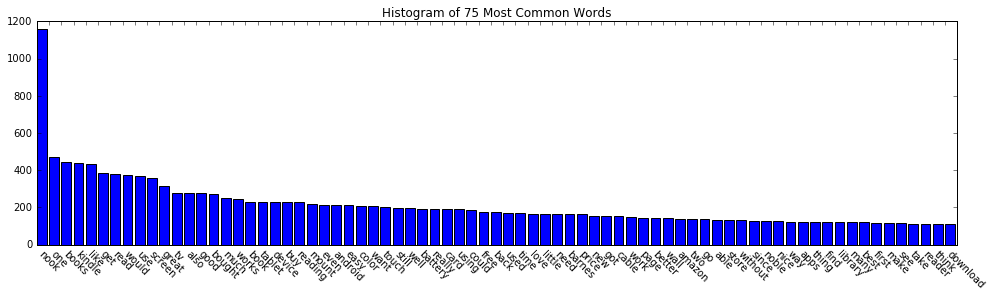

In [38]:
%matplotlib inline
most_common = word_set.most_common(N_COMMON_WORDS)
common_words = [Tuple[0] for Tuple in most_common]
common_counts = [Tuple[1] for Tuple in most_common]

fig, axis = plt.subplots(figsize = (16.5,4))
hist_font = {"fontsize": 10}
#Axis
N = np.arange(N_COMMON_WORDS)
axis.bar(N, common_counts)
axis.set_xticks(N)
axis.set_xlim(0,N_COMMON_WORDS)
axis.set_xticklabels(common_words, rotation=-45, ha="left", fontdict=hist_font)
axis.set_title("Histogram of {0} Most Common Words".format(N_COMMON_WORDS))
plt.show()